# Data Mining: Regression and Classification


## Contents:
* [Regression](#reg)
    * [Ordinay Least Sqaure Regression](#ols)    
    * [Ridge Regression](#ridge)
    * [Lasso Regression](#lasso)
* [Classification](#class)
    * [Logistic Regression](#log)
    * [SVM](#svm) 

## Regression <a name="reg"></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)


In [218]:
cars = pd.read_csv("cars.csv")
cars.head(5)

,mpg,cylinders,displ,hp,weight,acc,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [219]:
cars.drop('name',axis=1,inplace =True)

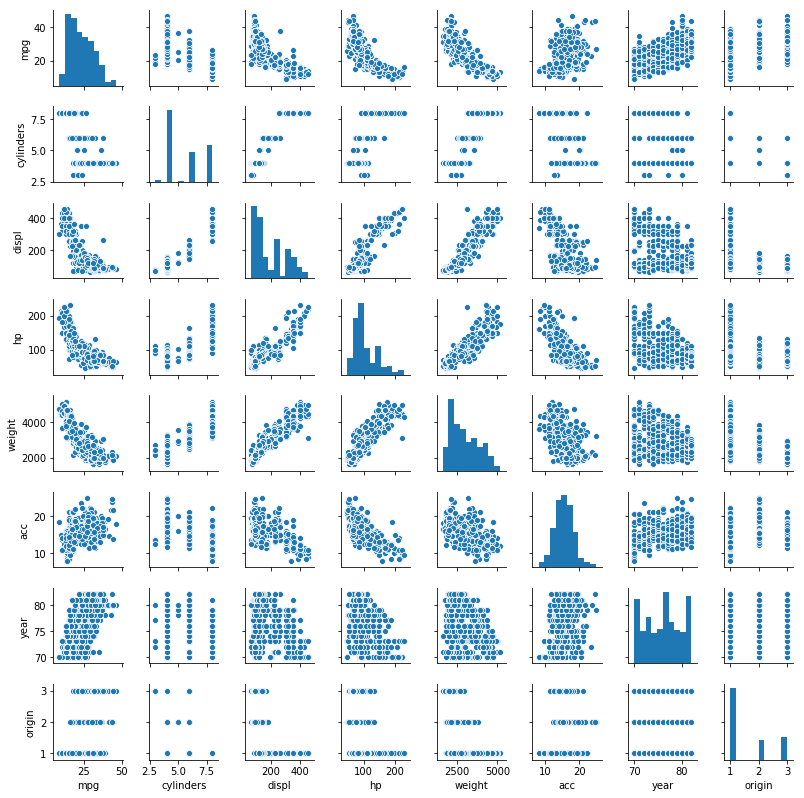

In [56]:
sns.pairplot(cars, palette='afmhot',height=1.4)

In [220]:
Y = cars['mpg'].values
X = cars.loc[:,~cars.columns.isin(['mpg','name'])].values

In [190]:
type(['mpg','name'])

list

In [221]:
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)

In [222]:
num_redundant_var = 100
redundant_var = np.random.randn(X.shape[0],num_redundant_var)


In [223]:
print(X.shape)
X = np.append(X, redundant_var, axis=1)
#
X = np.append(X, np.matrix(np.ones(X.shape[0])).T, axis=1)
print(X.shape)

(392, 7)
(392, 108)


In [226]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, Y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    #stratify=y,
                                                    random_state=123)

In [227]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(196, 108)
(196, 108)
(196,)
(196,)


### Ordinary Least Squre <a name="ols"></a>
#### $\beta_{ridge} = \mathrm{argmin}_{\beta \in \mathbb{R}^p}\| Y - X \beta \| _2 ^2 + \lambda \| \beta \|_2 ^2 $
#### $\beta_{ols} = (X^T X)^{-1}X^T Y $

In [228]:
beta_OLS = np.linalg.inv( np.dot(train_X.T, train_X) ).dot(train_X.T).dot(train_y)

In [229]:
print(train_X.shape)
print(train_X.T.shape)
print(np.linalg.inv( np.dot(train_X.T, train_X) ).shape)

print(train_y.shape)

(196, 108)
(108, 196)
(108, 108)
(196,)


In [230]:
np.power(train_y - train_X.dot(beta_OLS.T),2)

matrix([[7.11678195e-03, 9.11567658e-01, 4.18282960e+00, ...,
         8.90911931e-01, 9.11567658e-01, 9.81741042e-02],
        [3.12877537e+00, 5.32480948e-01, 1.30121276e-01, ...,
         6.90824873e+00, 5.32480948e-01, 1.88004128e+00],
        [3.83697533e+00, 8.45845031e-01, 2.91514144e-02, ...,
         7.94304133e+00, 8.45845031e-01, 2.43713122e+00],
        ...,
        [4.20443313e-02, 1.54795573e+00, 5.45037994e+00, ...,
         4.28335100e-01, 1.54795573e+00, 3.63290248e-01],
        [8.93201340e-01, 8.84131149e-03, 1.40295601e+00, ...,
         3.25663020e+00, 8.84131149e-03, 2.99652020e-01],
        [3.82061286e-01, 1.77249826e-01, 2.28447104e+00, ...,
         2.18339442e+00, 1.77249826e-01, 4.85861095e-02]])

In [231]:
ols_in_samp_err = np.mean(np.power(train_y - train_X.dot(beta_OLS.T),2 ))
ols_out_samp_err = np.mean(np.power(test_y - test_X.dot(beta_OLS.T),2 ))

### Ridge Regression  <a name="ridge"></a>

#### $\beta_{ridge} = \mathrm{argmin}_{\beta \in \mathbb{R}^p}\| Y - X \beta \| _2 ^2 + \lambda \| \beta \|_2 ^2 $
#### The closed form solution is  $\hat{\beta}_{ridge}= (X^T X +\lambda I)^{-1} X^T Y $


In [232]:
p = train_X.shape[1]
lambda_ridge = 100
beta_ridge = np.linalg.inv( np.dot(train_X.T, train_X) + lambda_ridge*np.identity(p) ).dot(train_X.T).dot(train_y)

In [233]:
ridge_in_samp_err = np.mean(np.power(train_y - train_X.dot(beta_ridge.T),2 ))
ridge_out_samp_err = np.mean(np.power(test_y - test_X.dot(beta_ridge.T),2 ))

In [234]:
print("OLS:  in-sample error is {},  out-of-sample error is {}".format(ols_in_samp_err, ols_out_samp_err) )
print("Ridge:  in-sample error is {},  out-of-sample error is {}".format(ridge_in_samp_err, ridge_out_samp_err) )

OLS:  in-sample error is 1.868452273055798,  out-of-sample error is 2.1158970769366543
Ridge:  in-sample error is 1.6177898712443881,  out-of-sample error is 1.6896420858391443


### Lasso Regression  <a name="ridge"></a>

#### $\beta_{lasso} = \mathrm{argmin}_{\beta \in \mathbb{R}^p} \frac{1}{2n}\| Y - X \beta \| _2 ^2 + \lambda \| \beta \|_1 $




In [235]:
from sklearn.linear_model import LassoCV
#from sklearn.datasets import make_regression

lambda_ls = np.power(10,np.arange(-2,1,0.05))
#potential Lambda

lasso = LassoCV(train_X, train_y ,cv=10, alphas=lambda_ls)
#.fit(X, y)
#reg.score(X, y) 

In [236]:
#lasso.mse_path_
lassofit = lasso.fit(train_X,train_y)

In [237]:
lasso.alpha_

0.056234132519034995

In [238]:
lasso.alphas

array([0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509,
       0.1       , 0.11220185, 0.12589254, 0.14125375, 0.15848932,
       0.17782794, 0.19952623, 0.22387211, 0.25118864, 0.28183829,
       0.31622777, 0.35481339, 0.39810717, 0.44668359, 0.50118723,
       0.56234133, 0.63095734, 0.70794578, 0.79432823, 0.89125094,
       1.        , 1.12201845, 1.25892541, 1.41253754, 1.58489319,
       1.77827941, 1.99526231, 2.23872114, 2.51188643, 2.81838293,
       3.16227766, 3.54813389, 3.98107171, 4.46683592, 5.01187234,
       5.62341325, 6.30957344, 7.07945784, 7.94328235, 8.91250938])

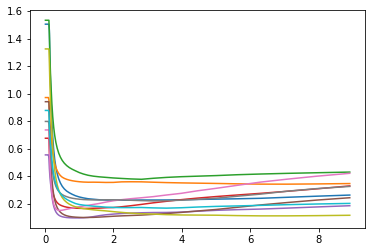

In [239]:
plt.plot(lasso.alphas,lasso.mse_path_)

In [240]:
Y_lasso_test = lassofit.predict(test_X)
Y_lasso_train = lassofit.predict(train_X)
lasso_in_samp_err = np.mean(np.power(train_y - Y_lasso_train,2 ))
lasso_out_samp_err = np.mean(np.power(test_y - Y_lasso_test,2 ))
#lassofit.coef_

In [242]:
lassofit.coef_

array([-0.        , -0.05055401, -0.06610592, -0.52368263,  0.00367795,
        0.32750553,  0.06257875,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.01312537,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.00740992,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.01993045,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [241]:
print("OLS:  in-sample error is {},  out-of-sample error is {}".format(ols_in_samp_err, ols_out_samp_err) )
print("Ridge:  in-sample error is {},  out-of-sample error is {}".format(ridge_in_samp_err, ridge_out_samp_err) )
print("Lasso:  in-sample error is {},  out-of-sample error is {}".format(lasso_in_samp_err, lasso_out_samp_err) )

OLS:  in-sample error is 1.868452273055798,  out-of-sample error is 2.1158970769366543
Ridge:  in-sample error is 1.6177898712443881,  out-of-sample error is 1.6896420858391443
Lasso:  in-sample error is 0.1873756671815091,  out-of-sample error is 0.19170432002588406


## Classification <a name="class"></a>

In [403]:
votes = pd.read_csv("votes.csv")
votes.head(5)

,white,black,hispanic,poverty,density,age65plus,population2014,population2010,clinton,trump,...,immigrant,foreign_lang,household_size,female,age18under,landarea,veteran,county_name,fips,state_abbr
0,0.779,0.187,0.027,12.1,91.8,0.138,55395,54571,0.239569,0.734358,...,0.016,0.035,2.71,0.514,0.252,594.44,5922,Autauga County,1001,AL
1,0.871,0.096,0.046,13.9,114.6,0.187,200111,182265,0.195653,0.773515,...,0.036,0.055,2.52,0.512,0.222,1589.78,19346,Baldwin County,1003,AL
2,0.502,0.476,0.045,26.7,31.0,0.165,26887,27457,0.466603,0.522714,...,0.029,0.050,2.66,0.466,0.212,884.88,2120,Barbour County,1005,AL
3,0.763,0.221,0.021,18.1,36.8,0.148,22506,22919,0.214220,0.769662,...,0.012,0.021,3.03,0.459,0.210,622.58,1327,Bibb County,1007,AL
4,0.960,0.018,0.087,15.8,88.9,0.170,57719,57322,0.084699,0.898519,...,0.043,0.073,2.70,0.505,0.236,644.78,4540,Blount County,1009,AL


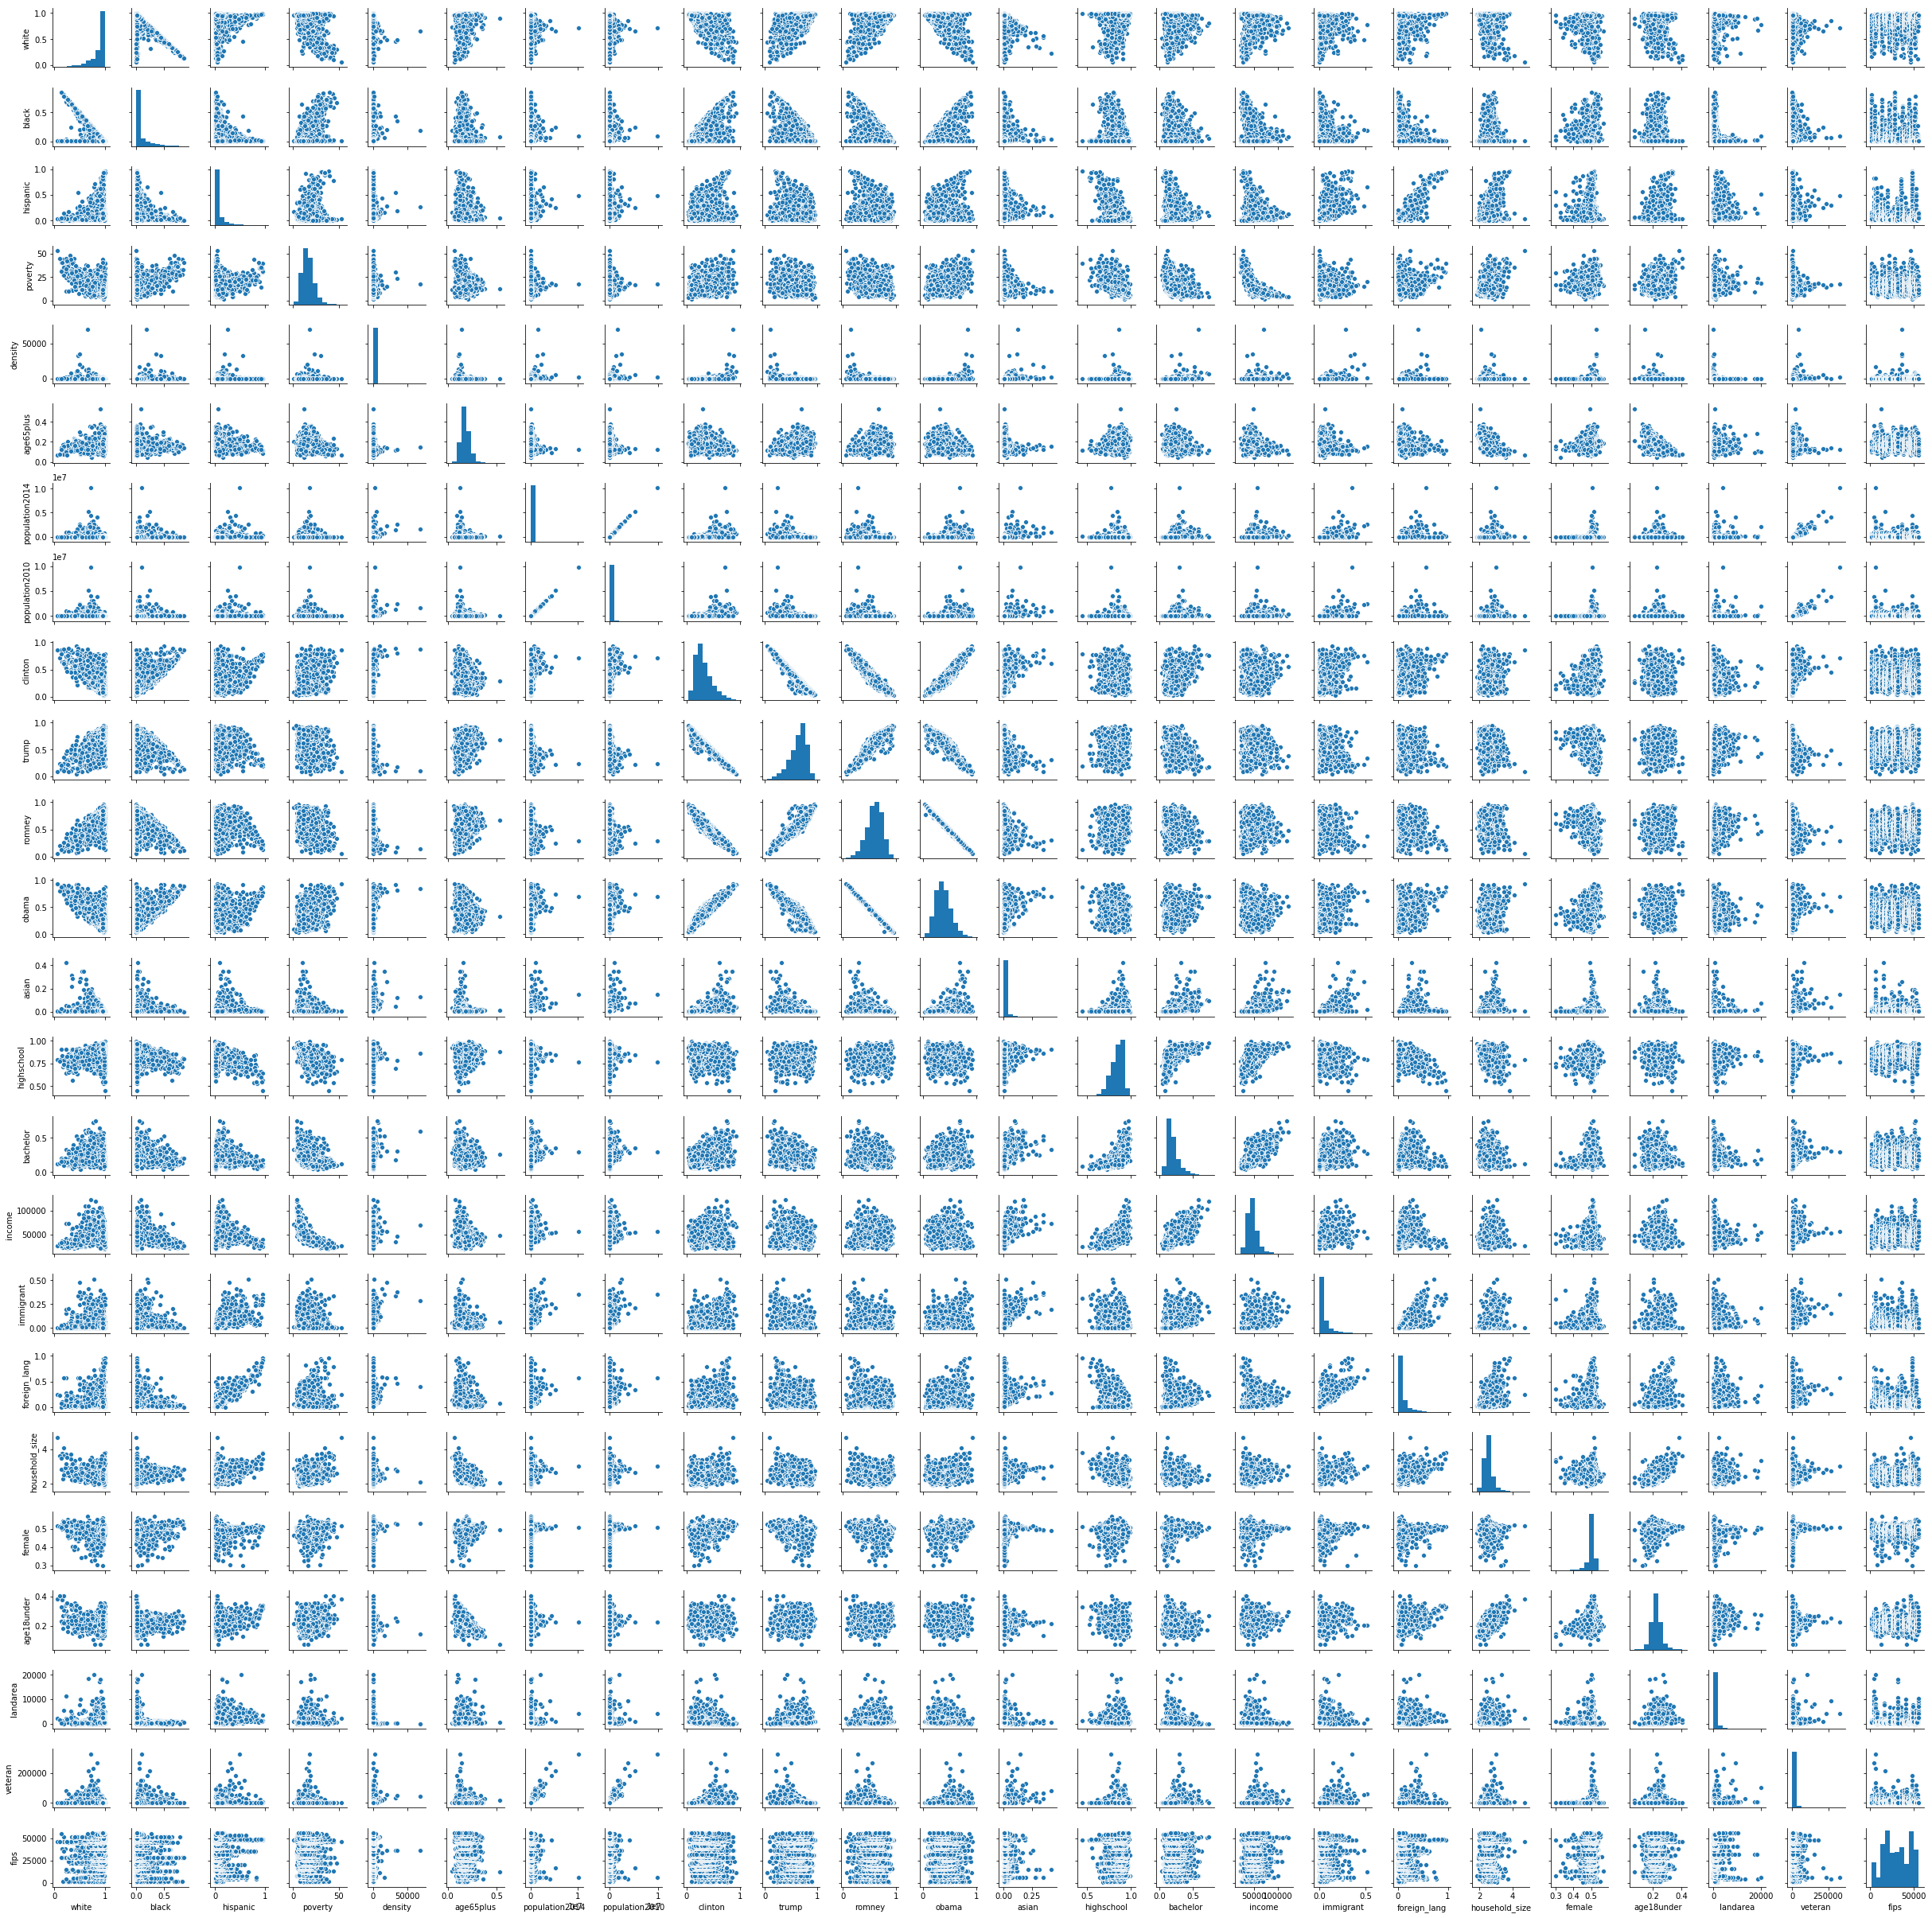

In [399]:
sns.pairplot(votes, palette='afmhot',height=1.4)

In [404]:
votes['prefer_trump'] = votes['trump'] > votes['clinton']

In [405]:
votes['prefer_trump'].head(5)

0    True
1    True
2    True
3    True
4    True
Name: prefer_trump, dtype: bool

In [406]:
features = ['white', 'black', 'poverty', 'density', 'bachelor', 'highschool', 'age65plus',
 'income', 'age18under', 'population2014']

In [407]:
votes.loc[:,votes.columns.isin(features)].values

array([[7.7900e-01, 1.8700e-01, 1.2100e+01, ..., 2.0900e-01, 5.3682e+04,
        2.5200e-01],
       [8.7100e-01, 9.6000e-02, 1.3900e+01, ..., 2.7700e-01, 5.0221e+04,
        2.2200e-01],
       [5.0200e-01, 4.7600e-01, 2.6700e+01, ..., 1.3400e-01, 3.2911e+04,
        2.1200e-01],
       ...,
       [9.5400e-01, 9.0000e-03, 1.3300e+01, ..., 1.8900e-01, 5.8515e+04,
        2.9800e-01],
       [9.4800e-01, 8.0000e-03, 1.2100e+01, ..., 2.3600e-01, 4.7104e+04,
        2.3900e-01],
       [9.5000e-01, 7.0000e-03, 1.1200e+01, ..., 1.7200e-01, 5.5461e+04,
        2.1600e-01]])

In [432]:
mask1 = votes['prefer_trump'] == 0
mask2 = votes['prefer_trump'] == 1
column_name = 'prefer_trump'
votes.loc[mask1, column_name] = -1
votes.loc[mask2, column_name] = 1

In [433]:
Y = votes['prefer_trump'].values
X = votes.loc[:,votes.columns.isin(features)].values

In [434]:
X =preprocessing.scale(X)
#preprocessing.scale(Y)

In [435]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, Y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    #stratify=y,
                                                    random_state=123)

### Support Vector Machine <a name="svm"></a>


$\hat{w}, \hat{b} = \mathrm{argmin}_{w \in \mathbb{R}^p, b \in \mathbb{R}, \xi \in \mathbb{R}^n } \frac{1}{2}\| w \|_2^2 + C\sum_{i=1}^n \xi_i $ 


Subject to $ Y_i(X_i^T+b) \geq 1, \forall i =1, 2, ..., n$

<img src="files/svm.png">

In [436]:
from sklearn.svm import SVC

In [486]:
C_ = 0.5
deg = 1

In [487]:
clf = SVC(C = C_, kernel = 'poly', degree = deg)

In [488]:
clf.fit(train_X, train_y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [489]:
Y_Hat = clf.predict(test_X)

In [490]:
Y_Hat = Y_Hat.astype(int)

In [491]:
Y_Hat[Y_Hat == 1] = 1

In [492]:
Y_Hat[Y_Hat == 0] = -1

In [493]:
svm_error = np.mean(abs(Y_Hat - test_y))/2 

In [494]:
svm_error

0.08161953727506427

### Logistic Regression  <a name="log"></a>

<img src="files/logistic.png">

In [461]:
train_y[train_y == -1] = 0
test_y[test_y == -1] = 0

In [462]:
train_X

array([[ 0.38640481, -0.58702223, -0.89519262, ...,  0.27832708,
         0.64255251,  0.25874194],
       [ 0.63346091, -0.51105867,  2.03285759, ..., -1.16016568,
        -0.4763256 ,  0.91879517],
       [ 0.79183021, -0.60083379,  0.0602764 , ..., -0.45790937,
        -0.6240348 , -0.07128467],
       ...,
       [-4.46603054, -0.62155112,  3.6664014 , ..., -0.23137508,
        -0.819455  ,  4.48908308],
       [-1.36199226,  1.56758063,  0.49177853, ..., -0.16341479,
        -0.41107254,  0.79878549],
       [ 0.62079137, -0.59392801, -0.74108472, ..., -0.42392923,
         0.15154442,  0.70877824]])

In [463]:
#train_X = np.append(train_X, np.matrix(np.ones(train_X.shape[0])).T, axis=1)
#test_X = np.append(train_X, np.matrix(np.ones(test_X.shape[0])).T, axis=1)

In [464]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True).fit(train_X, train_y)



In [465]:
Y_Hat_logistic = clf.predict(test_X)

In [497]:
logistic_out_samp_err = np.mean(abs(Y_Hat_logistic - test_y))

In [498]:
print("SVM:  out-of-sample error is {}".format(svm_error) )
print("Logistic:   out-of-sample error is {}".format( svm_out_samp_err) )


SVM:  out-of-sample error is 0.08161953727506427
Logistic:   out-of-sample error is 0.08419023136246787


Thank you for filling out the registration form
https://libguides.rutgers.edu/graduatespecialist/workshops

Thank you for your Feedback.
http://bit.ly/graduatespecialistfeedbackquantitative
